In [58]:
# analise tentenças 
# analise sazonalidade




import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_matriculas.xlsx")

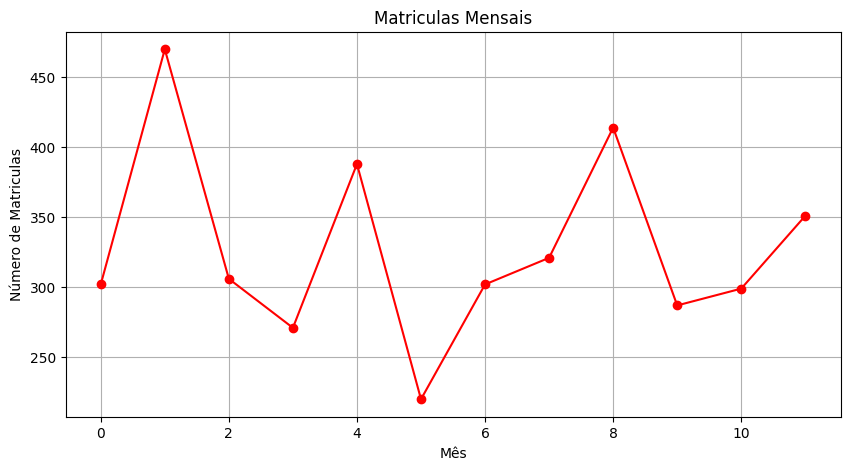

In [59]:
# Gráfico de matriculas mensais
# puxar informações de algo (df)


#titulo
#.x
#.y
#legenda


plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="o", linestyle='-', color="red")
plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número de Matriculas")
plt.grid(True)
plt.show()

In [60]:
# Identificar o Mês com maior e menor número de matriculas

maior_matricula = df["Matrículas"].max()
indice_maior_matricula = df["Matrículas"].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [61]:
menor_matricula = df["Matrículas"].min()
indice_menor_matricula = df["Matrículas"].idxmin()

print(menor_matricula)
print(indice_menor_matricula)

220
5


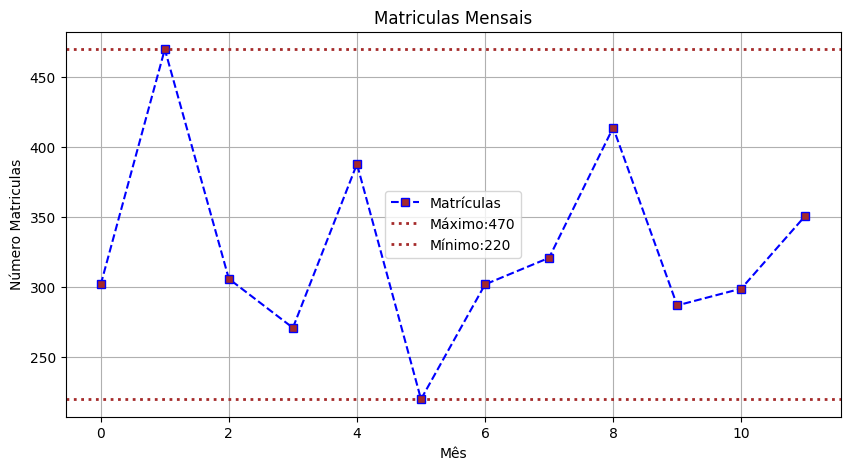

In [62]:
plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="s", linestyle="--", color="blue", label="Matrículas", mfc="brown")

# Informações de Destaque
plt.axhline(y=maior_matricula, 
            color="brown", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{maior_matricula}")

plt.axhline(y=menor_matricula,
            color="brown",
            linestyle=":",
            linewidth=2,
            label=f"Mínimo:{menor_matricula}")

plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número Matriculas")
plt.grid(True)
plt.legend()
plt.show()

In [63]:
# Calculo Médio de matriculas mensais

media_matriculas = df["Matrículas"].mean()
print(media_matriculas)

327.5833333333333


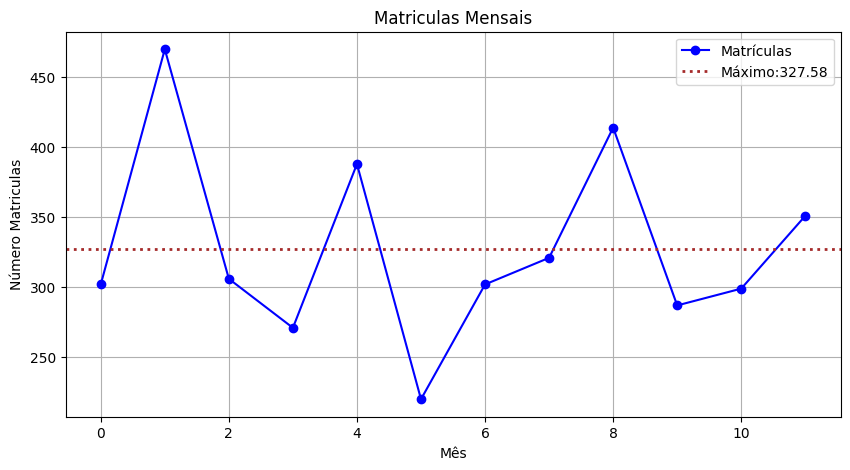

In [64]:
# Plotar o grafico das matriculas mensais e destacar a media

plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="o", linestyle="-", color="blue", label="Matrículas")

# Informações de Destaque
plt.axhline(y=media_matriculas, 
            color="brown", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{media_matriculas:.2f}")

plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número Matriculas")
plt.grid(True)
plt.legend()
plt.show()

In [65]:
#Agrupar por trimestre

#Passo 1. Converter coluna para datetime

df["Mês"] = pd.to_datetime(df["Mês"])

#Passo 2. Definir coluna datas como indice

df.set_index("Mês", inplace=True)

#Passo 3. Calcular média do trimestre
#QE = trimestre
#QS = semestre
#Q = quadrimestre
#A = anual
#D = diario
#W = Semanal
#H = horário

media_trimestral = df["Matrículas"].resample("QE").mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


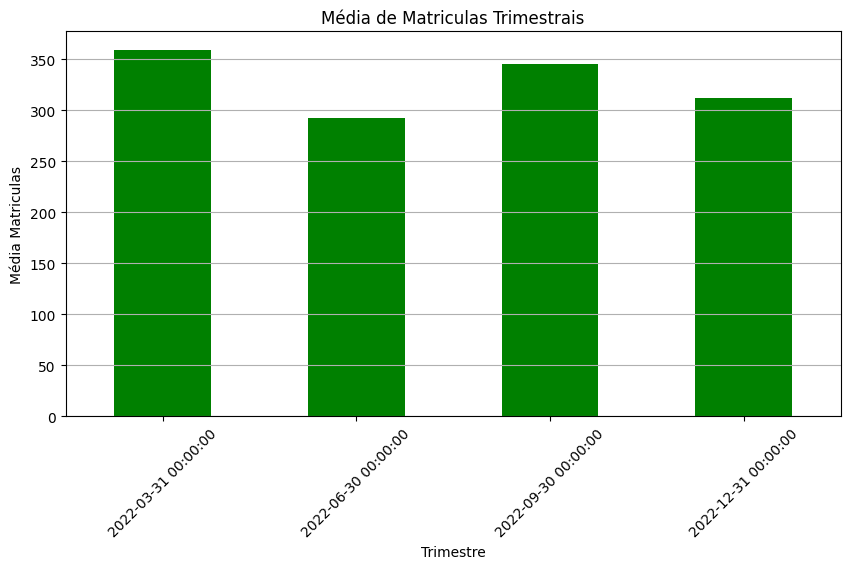

In [66]:
plt.figure(figsize=(10,5))
media_trimestral.plot(kind="bar", color = "green")
plt.title("Média de Matriculas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média Matriculas")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

In [67]:
#Desvio Padrão

#Passo 1.  Calcular Média

#Passo 2. Calcular desvio em relação a média

#Desvio Simples

df["Matrículas"] - df["Matrículas"].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

In [68]:
#Variancia
#1. Media
#2. Desvio Simples
#3. Desvio elevado a 2
#4. Média do Desvio


In [69]:
#Desvio Padrão

#1. Media
#2. Desvio Simples
#3. Variancia


In [70]:
#Calculo da variação padrão
#variacao_padrão = df["Matrículas"].pct_change()
#Variação percentual

variacao = df["Matrículas"].pct_change()*100

print(variacao)

Mês
2022-01-31          NaN
2022-02-28    55.629139
2022-03-31   -34.893617
2022-04-30   -11.437908
2022-05-31    43.173432
2022-06-30   -43.298969
2022-07-31    37.272727
2022-08-31     6.291391
2022-09-30    28.971963
2022-10-31   -30.676329
2022-11-30     4.181185
2022-12-31    17.391304
Name: Matrículas, dtype: float64


In [72]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    "Matrículas": df["Matrículas"],
    "Variação Percentual %": variacao

})

def colorir_variacao(valor):
    if valor > 0:
        color = "green"
    elif valor < 0:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

tabela_variacao.style.map(colorir_variacao, subset = ["Variação Percentual %"])

,Matrículas,Variação Percentual %
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
